In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
from dask.distributed import Client
from collections import OrderedDict
import xarray as xr

import IPython.display
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd



In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [7]:
basinmask = xr.open_dataset('/scratch/e14/cy8964/access-om2/mask/basin_mask.nc')

In [45]:
from matplotlib.lines import Line2D


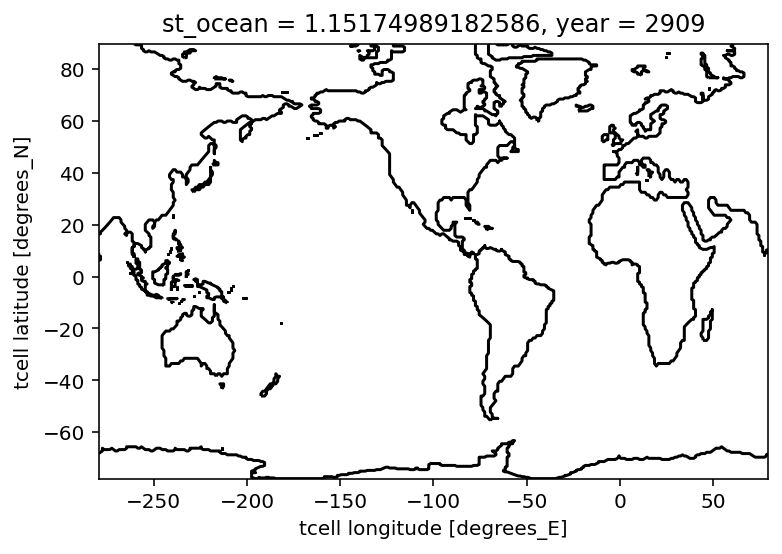

In [38]:
dset = xr.merge([temp_warm.groupby('time.year').mean(dim='time').isel(year = 19,st_ocean = 0)])
ds = dset
mask_ocean = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.temp)  
mask_land = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.temp)  
mask_array = mask_ocean + mask_land
mask_array.plot.contour(colors = 'k', levels = [2])

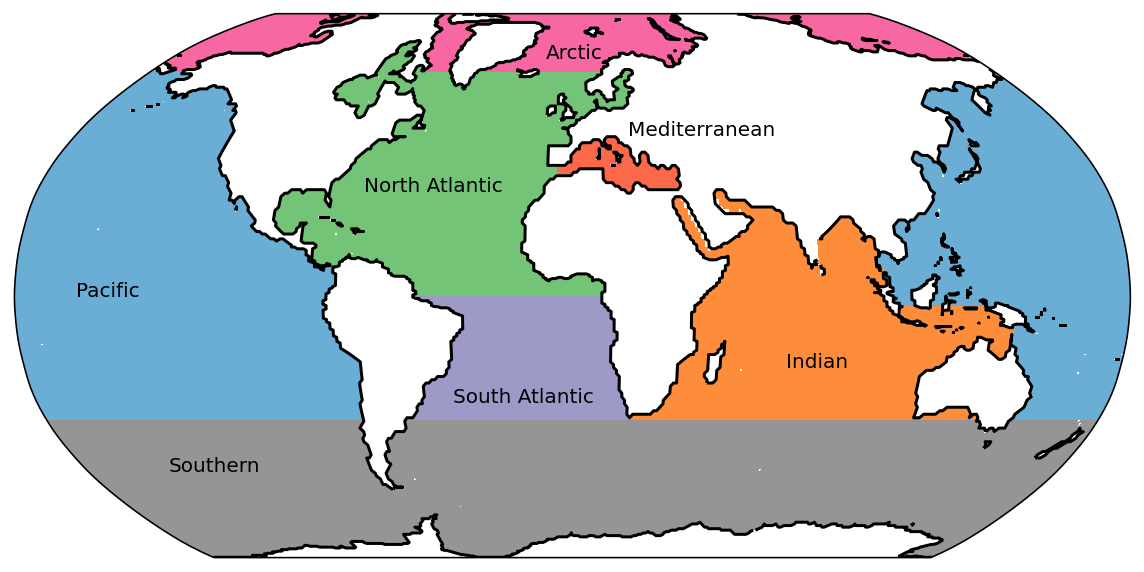

In [46]:
fig = plt.figure(figsize = (10,7))

#cmaps = np.array(['Greys','Blues','Greens','Purples','RdPu','Oranges','Reds','viridis'])
#cmap = plt.cm.coolwarm
#custom_lines = [Line2D([0], [0], color=cmap(1.), lw=4),
               # Line2D([0], [0], color=cmap(.5), lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)]

ax = plt.axes(projection=ccrs.Robinson())

(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK < 2)).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Greys')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 2).where(basinmask.BASIN_MASK < 4)/3).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Blues')

(basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Greens')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 7).where(basinmask.BASIN_MASK < 9)/8).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Greens')

(basinmask.BASIN_MASK.where(basinmask.YT_OCEAN < 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Purples')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 3).where(basinmask.BASIN_MASK < 5)/4).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'RdPu')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Oranges')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 5).where(basinmask.BASIN_MASK < 7)/6).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Reds')

(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 8).where(basinmask.BASIN_MASK < 10)/9).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Greens')
(basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 9)/10).isel(ST_OCEAN1_1 = 0).plot(ax=ax, transform=ccrs.PlateCarree(), x='XT_OCEAN', y='YT_OCEAN',add_colorbar = False, cmap = 'Oranges')

#plt.legend(custom_lines, ['Cold', 'Medium', 'Hot'], bbox_to_anchor=(1, 2),
           #bbox_transform=plt.gcf().transFigure)
ax.text(-150,-50,'Southern',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(-40,-30,'South Atlantic',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(-70,30,'North Atlantic',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(70,-20,'Indian',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(-160,0,'Pacific',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(-12,70,'Arctic',fontsize = 10, transform=ccrs.PlateCarree())
plt.text(20,46,'Mediterranean',fontsize = 10, transform=ccrs.PlateCarree())
#plt.text(25,50,'Small basins',fontsize = 10, transform=ccrs.PlateCarree())
mask_array.plot.contour(colors = 'k', linewidth = 0.25, levels = [2],ax=ax, transform=ccrs.PlateCarree())
plt.title('')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('map',dpi = 600)